##  <span style= "color:blue">IEE065 - Análise de Sobrevivência e Confiabilidade
#### Amazoneida Sá Peixoto Pinheiro
  Professora Associada do Depto. Estatística - UFAM
### Aula 08: Tópico III: Estimação não Paramétrica
#### Data: 03/02/2022

        * Nesta aula revisaremos a construção dos estimadores não paramétricos KM e NA,            e apresentaremos a variância e erro-padrão do estimador KM. 

##  <span style= "color:red">Estimação da Variância assintótica 

### 1.  Estimador  de  KM 

## $\hat{Var}(S(t)) = [\hat{S}(t)]^2 \sum_{j:t_j< t}\frac{\Delta N(t_j)}{R(t_j)[R(t_j)-\Delta N(t_j)]}$

    * No exemplo dos dados do IPEC, temos:

   * $\hat{Var}(S(16)) = [0.9524 ]^2 \frac{1}{21[21-1]}=0.0021597$ 
   
   * $\sqrt{\hat{Var}(S(16)) }= 0.046472$ -> Erro-padrão

In [6]:
sqrt((0.9524^2) * (1/(21*20)))


[1] 0.04647236

##  <span style= "color:red">Intervalo de Confiança para $S(t)$

   * Como  $\hat{S}(t)$  para t fixo, tem distribuição assintótica Normal, segue que, um intervalo de $100(1-\alpha)$% de confiança para $S(t)$ é dado por:
    
   * $\hat{S}(t) \pm z_{\alpha/2}\sqrt{\hat{Var}[\hat{S}(t)]} $
   
   onde: $\alpha/2$ denota o percentil superior da distribuição Normão Padrão.
   
   
   * No Exemplo acima: $IC[S(16), 95 \%] = 0.9524 \pm \sqrt{0.0021597} =[0.8613;1.0]$
   

In [12]:
0.9524+1.96*sqrt(0.0021597)

[1] 1.043486

     * Obs: Para valores extremos de t, esse intervalo pode apresentar limite inferior               negativo, ou limite superior maior que 1.*

   ### Transformação proposta por Kalbflesh e Prentice (2002)

  ###  $\hat{U}(t) = log[−log(S(t))]$ 
  
## $\hat{Var}(\hat{U}(t)) = \frac{\sum_{j:t_j< t}\frac{\Delta N(t_j)}{R(t_j)[R(t_j)-\Delta N(t_j)]}}{[\sum_{j:t_j< t} log(\frac{(\Delta N(t_j)}{R(t_j)[R(t_j)-\Delta N(t_j)]})]^2}$

   * Assim, um intervalo de $100(1-\alpha)$% de confiança para $S(t)$ é dado por:
  
## $\hat{S}(t)^{exp [ \pm z_{\alpha/2}\sqrt{\hat{Var}\hat{U}(t)}]}$

### Estimação  das Quantidades Básicas

    * A estimativa de KM para S(39) = 0.5916 = 59.16%
    
    * No entanto, se  o valor do tempo de interesse estiver ao longo de um degrau da           curva de Kaplan-Meier pode-se também utilizar uma interpolação linear:
    
    * por exemplo: S(30)= ? 
    
   * $\hat{S}(30) = \frac{35-29}{0.6992 - 0.7529-}=\frac{30-29}{\hat{S}(30)-0.7529}=\frac{6}{-0.0537}=\frac{1}{\hat{S}(30)-0.7529}= $


In [17]:
s=(6*0.7529+0.0537)/6

In [18]:
s

[1] 0.76185

### Tempo Mediano

$t_{md}= min\{t_j| \hat{S}(t_j) \leq 0.50\}$

Interpolação linear:

$t_{md}->\frac{52-40}{0.4781-0.5358}=\frac{t_{md}-40}{0.50-0.5358}$


Call: survfit(formula = Surv(tempos, cens) ~ grupos)

                grupos=1 
        time       n.risk      n.event     survival      std.err lower 95% CI 
       3.000       13.000        2.000        0.846        0.100        0.671 
upper 95% CI 
       1.000 

                grupos=2 
 time n.risk n.event survival std.err lower 95% CI upper 95% CI
    1     14       3    0.786   0.110        0.598        1.000
    5      9       1    0.698   0.128        0.488        0.999
    7      8       1    0.611   0.138        0.392        0.952
    8      7       1    0.524   0.143        0.306        0.896
   10      6       1    0.437   0.144        0.229        0.832


Warning message in strwidth(legend, units = "user", cex = cex, font = text.font):
“conversion failure on 'Estero ́ide' in 'mbcsToSbcs': dot substituted for <cc>”
Warning message in strwidth(legend, units = "user", cex = cex, font = text.font):
“conversion failure on 'Estero ́ide' in 'mbcsToSbcs': dot substituted for <81>”
Warning message in text.default(x, y, ...):
“conversion failure on 'Estero ́ide' in 'mbcsToSbcs': dot substituted for <cc>”
Warning message in text.default(x, y, ...):
“conversion failure on 'Estero ́ide' in 'mbcsToSbcs': dot substituted for <81>”


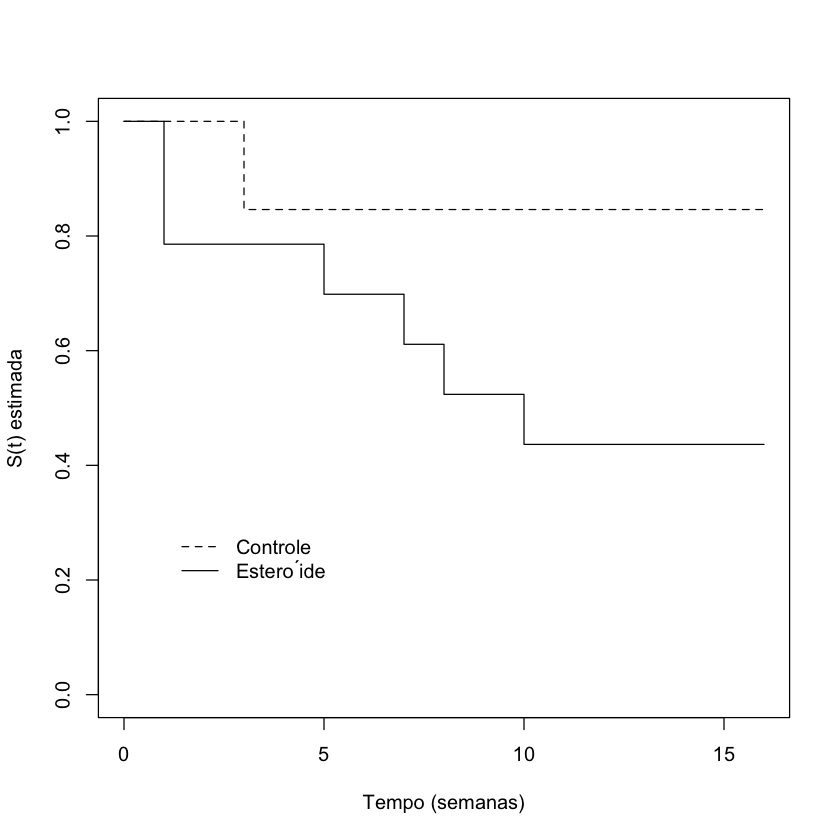

In [23]:
# Dados de Hepatite,
require(survival)
tempos<- c(1,2,3,3,3,5,5,16,16,16,16,16,16,16,16,1,1,1,1,4,5,7,8,10,10,12,16,16,16) 
cens<-c(0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,0,1,1,1,1,0,0,0,0,0)
grupos<-c(rep(1,15),rep(2,14))
ekm<- survfit(Surv(tempos,cens)~grupos)
summary(ekm)
plot(ekm, lty=c(2,1),conf.int=F, xlab="Tempo (semanas)",ylab="S(t) estimada")
legend(1,0.3,lty=c(2,1),c("Controle","Estero ́ide"),lwd=1, bty="n")